# <font color='Blue'>Black Friday Sales prediction.</font>

<img src="Anjublackfridaysale.png" style = "width:800px;height:500px"/>

In [1]:
%%HTML
<video width="900" height="600" controls>
  <source src="C:/Users/Anju/Anjublackfriday.mp4" type="video/mp4">
</video>

# <font color='Blue'>Use below script to see output of whole code.</font>

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_Interactivity = 'all'


# <font color='Blue'>Install/import packages libraries.</font>


In [7]:
from sklearn.metrics import make_scorer, accuracy_score # for accuracy
from sklearn.model_selection import train_test_split # for splitting the train-test data
from sklearn.ensemble import RandomForestClassifier # random forest model
from sklearn.linear_model import LogisticRegression # regression
from sklearn.metrics import classification_report # to create all accuracy matrices
from sklearn.model_selection import GridSearchCV # hyper parameter optimization
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
from sklearn.metrics import accuracy_score # accuracy score / accuracy
from sklearn import preprocessing # EDA

import matplotlib.pylab as pylab # visualization
import matplotlib.pyplot as plt # visualization

from pandas import get_dummies # EDA

import matplotlib as mpl  # visualization
import xgboost as xgb # EDA
import seaborn as sns # visualization
import pandas as pd # EDA
import numpy as np # EDA
import matplotlib # visualization
import warnings # EDA
import sklearn # machine learning
import scipy  # EDA
import json # EDA
import sys # EDA
import csv # EDA
import os # to work with the the work libraries / system related variables
import math

# <font color='Blue'>Load the Black Friday train and test data into pandas dataframe.</font>
>  - <font color='brown'>*The black friday sales data is a freely available dataset on Kaggle.*</font>
>  - <font color='brown'>*Purchase is our dependent variable.*</font>
>  - <font color='brown'>*We need to predict the Purchase statistics on various features based on historical data from previous years.*</font>

In [8]:

Blackfriday_train = pd.read_csv('C:\\Users\\Anju\\Desktop\\Python\\Projects\\Black Friday\\train.csv')
Blackfriday_test =  pd.read_csv('C:\\Users\\Anju\\Desktop\\Python\\Projects\\Black Friday\\test.csv')


# <font color='Blue'> Features defining the Black Friday sales.</font>

>  - <font color='brown'>*The train dataset has 550068 observations of the below features.*</font>
>  - <font color='brown'>*The test dataset has 233599 observations of the below features.*</font>

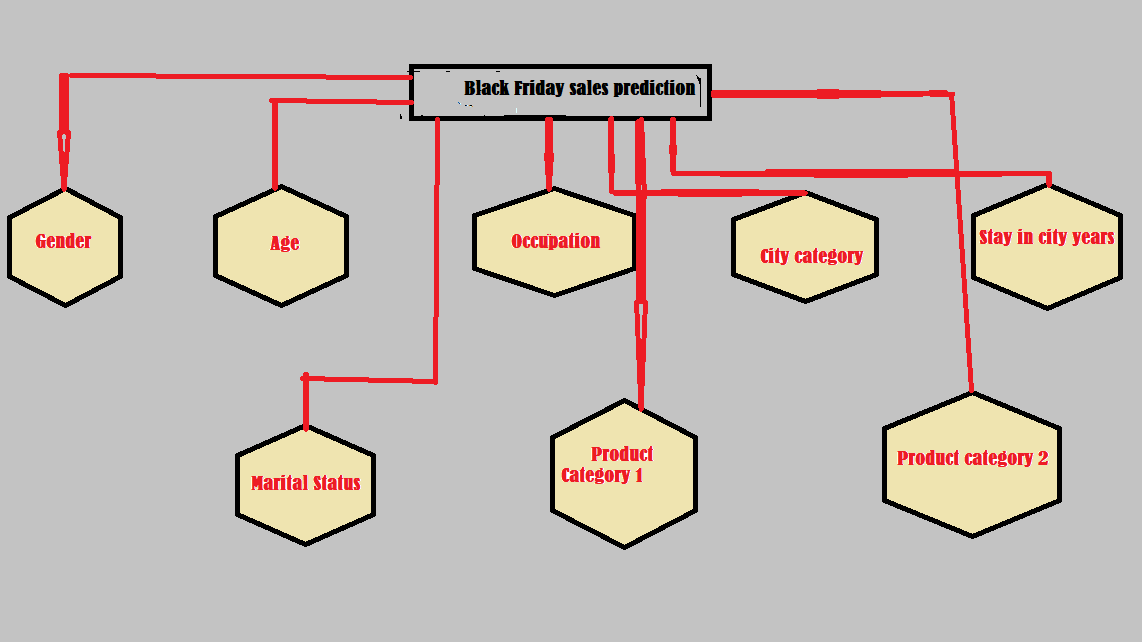

In [9]:
from IPython.display import Image
Image(filename = "C:/Users/Anju/AnjuFeaturesdefiniiton.png",width = 600,height=600)


# <font color='Blue'> Layout on train and test dataframe.</font>

>  <font color='brown'>*Blackfriday_train shape and layout.*</font>

In [5]:
print('train data shape:', Blackfriday_train.shape)
Blackfriday_train.describe()

train data shape: (550068, 12)


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


>  <font color='brown'>*Blackfriday_test shape and layout.*</font>

In [160]:
print('test data shape:', Blackfriday_test.shape)
Blackfriday_test.describe()

test data shape: (233599, 8)


,Occupation,Marital_Status,Product_Category_1,Product_Category_2
count,233599.000000,233599.000000,233599.000000,233599.000000
mean,8.085407,0.410070,5.276542,9.849586
std,6.521146,0.491847,3.736380,4.233114
min,0.000000,0.000000,1.000000,2.000000
25%,2.000000,0.000000,1.000000,8.000000
50%,7.000000,0.000000,5.000000,9.849586
75%,14.000000,1.000000,8.000000,14.000000
max,20.000000,1.000000,18.000000,18.000000


>  <font color='brown'>*Display the first 5 rows of Blackfriday_train.*</font>

In [161]:
Blackfriday_train.head(n=5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.842329,8370
1,F,0-17,10,A,2,0,1,6.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,1422
3,F,0-17,10,A,2,0,12,14.000000,1057
4,M,55+,16,C,4+,0,8,9.842329,7969


>  <font color='brown'>*Display the first 5 rows of Blackfriday_test.*</font>

In [8]:
Blackfriday_test.head(n=5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# <font color='Blue'>Print columns of the train dataframe.</font>

In [9]:

print("Train Data columns before dropping User-ID and product_ID")
print("--------------------------------------------")
print(pd.DataFrame(Blackfriday_train.columns))


Train Data columns before dropping User-ID and product_ID
--------------------------------------------
                             0
0                      User_ID
1                   Product_ID
2                       Gender
3                          Age
4                   Occupation
5                City_Category
6   Stay_In_Current_City_Years
7               Marital_Status
8           Product_Category_1
9           Product_Category_2
10          Product_Category_3
11                    Purchase


#  <font color='Blue'>Dropping the unnecessary columns from train dataframe: User_ID and Product_ID.</font>

In [10]:
Blackfriday_train = Blackfriday_train.drop(['User_ID','Product_ID'], axis=1)

>  <font color='brown'>*Print colums of the dataframe Blackfriday_train after dropping unnrcessary columns.*</font>


In [11]:
print("Train Data columns after dropping User-ID and product_ID")
print("--------------------------------------------")
print(pd.DataFrame(Blackfriday_train.columns))


Train Data columns after dropping User-ID and product_ID
--------------------------------------------
                            0
0                      Gender
1                         Age
2                  Occupation
3               City_Category
4  Stay_In_Current_City_Years
5              Marital_Status
6          Product_Category_1
7          Product_Category_2
8          Product_Category_3
9                    Purchase


# <font color='Blue'>Print columns of the test dataframe.</font>

In [12]:
print("Test Data columns before dropping User-ID and product_ID")
print("--------------------------------------------")
print(pd.DataFrame(Blackfriday_test.columns))


Test Data columns before dropping User-ID and product_ID
--------------------------------------------
                             0
0                      User_ID
1                   Product_ID
2                       Gender
3                          Age
4                   Occupation
5                City_Category
6   Stay_In_Current_City_Years
7               Marital_Status
8           Product_Category_1
9           Product_Category_2
10          Product_Category_3


#  <font color='Blue'>Dropping the unnecessary columns from test dataframe: User_ID and Product_ID.</font>

In [11]:
Blackfriday_test = Blackfriday_test.drop(['User_ID','Product_ID'], axis=1)

>  <font color='brown'>*Print colums of the dataframe Blackfriday_test after dropping unnrcessary columns.*</font>


In [14]:
print("Test Data columns after dropping User-ID and product_ID")
print("--------------------------------------------")
print(pd.DataFrame(Blackfriday_test.columns))


Test Data columns after dropping User-ID and product_ID
--------------------------------------------
                            0
0                      Gender
1                         Age
2                  Occupation
3               City_Category
4  Stay_In_Current_City_Years
5              Marital_Status
6          Product_Category_1
7          Product_Category_2
8          Product_Category_3


# <font color='Blue'>Dealing with missing data from test and train dataset.</font>
 

>  <font color='brown'>*Get total count of missing data from train dataset.*</font>

In [15]:

total_missing_values = Blackfriday_train.isnull().sum().sort_values(ascending=False)
total_missing_values



Product_Category_3            383247
Product_Category_2            173638
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
dtype: int64

>  <font color='brown'>*Get percent of missing data from train dataset.*</font>

In [16]:

percent_missing_values = (Blackfriday_train.isnull().sum()/Blackfriday_train.isnull().count()).sort_values(ascending=False)
percent_missing_values


Product_Category_3            0.696727
Product_Category_2            0.315666
Purchase                      0.000000
Product_Category_1            0.000000
Marital_Status                0.000000
Stay_In_Current_City_Years    0.000000
City_Category                 0.000000
Occupation                    0.000000
Age                           0.000000
Gender                        0.000000
dtype: float64

>  <font color='brown'>*Concat total and percent missing from train dataset.*</font>

In [17]:

missing_data = pd.concat([total_missing_values, percent_missing_values], axis=1, keys=['Total', 'Percent'])
missing_data


,Total,Percent
Product_Category_3,383247,0.696727
Product_Category_2,173638,0.315666
Purchase,0,0.000000
Product_Category_1,0,0.000000
Marital_Status,0,0.000000
Stay_In_Current_City_Years,0,0.000000
City_Category,0,0.000000
Occupation,0,0.000000
Age,0,0.000000
Gender,0,0.000000


>  <font color='brown'>*Since we can see above, Product_Category_3 has more than 60% missing values, so we can drop the column.*</font>

In [12]:

Blackfriday_train = Blackfriday_train.drop('Product_Category_3', axis=1)


In [13]:
Blackfriday_test = Blackfriday_test.drop('Product_Category_3', axis=1)

>  <font color='brown'>*Impute the second column Product_category_2 which has around 30% missing values with mean*</font>

In [14]:

Blackfriday_train.Product_Category_2 = Blackfriday_train.Product_Category_2 .fillna(np.mean(Blackfriday_train.Product_Category_2))


In [15]:

Blackfriday_test.Product_Category_2 = Blackfriday_test.Product_Category_2 .fillna(np.mean(Blackfriday_test.Product_Category_2))


>  <font color='brown'>*Print max count number of null values after imputing.*</font>

In [20]:

print('Number of missing values in train dataset = ',Blackfriday_train.isnull().sum().max())


Number of missing values in train dataset =  0


In [142]:
print('Number of missing values in test dataset = ',Blackfriday_train.isnull().sum().max())

Number of missing values in test dataset =  0


# <font color='Blue'> Data types of the columns from test and train dataset.</font>

>  <font color='brown'>*Data types of various features :Train dataset .*</font>

In [21]:
Blackfriday_train.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

>  <font color='brown'>*Data types of various features :Test dataset .*</font>

In [22]:
Blackfriday_test.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

>  <font color='brown'>* Note: Data capping is not required for black friday dataset as all are categorical features.Data capping is applied only on numerical continuos data*</font>

# <font color='Blue'>Data Visualization/Exploratory Data Analysis/Feature Engineering.</font>

>  <font color='brown'>*Plot correlation matrix to determine collinearity between different variables .*</font>

>  <font color='brown'>*Plot correlation matrix using seaborn library to determine collinearity between different variables .*</font>

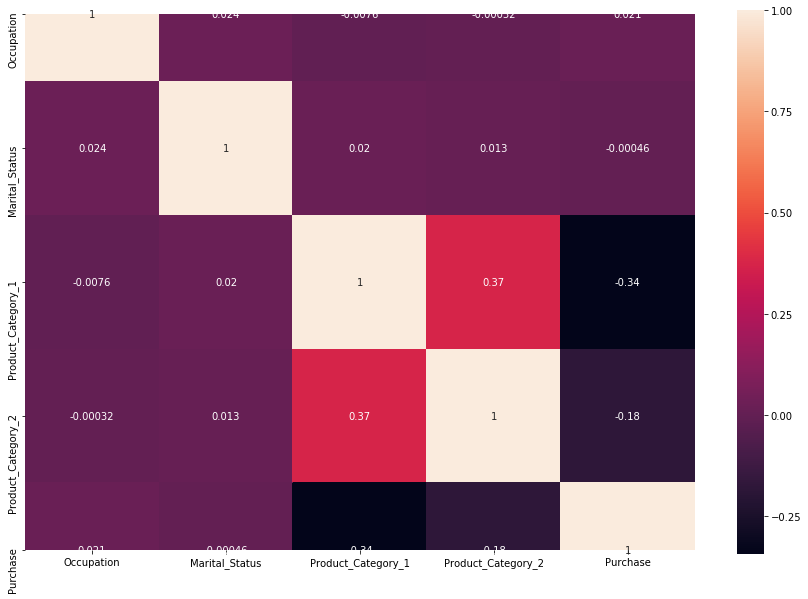

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
hmap = Blackfriday_train.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(hmap, vmax=1,annot=True,square=True);

>  <font color='brown'>*Plot correlation matrix using pairplot to determine collinearity between different variables .*</font>

>  1. <font color='orange'>*Pairplot plots only numerical columns and in ‘hue’ parameter we can provide the categorical column.*</font>

>  2. <font color='orange'>*The Pair Plots Can Be Divided Into Three Parts:*</font>
    - <font color='orange'>*The diagonal plot which allows us to see the PDF/Probability distribution of a single variable*</font>
   2. <font color='orange'>*Upper triangle and lower triangle which shows us the scatter plot.*</font>
   3. <font color='orange'>*The scatter plots show us the relationship between the features. These upper and lower triangles are the mirror image of each other.*</font>
   
>  3. <font color='orange'>*The Pallete option has different inbuilt functions like 'husl' etc etc to colour the graphs, we can also pass our own colours to it by defining a list of colours before plotting the graph and then using the list name*</font>

C:\Users\Anju\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


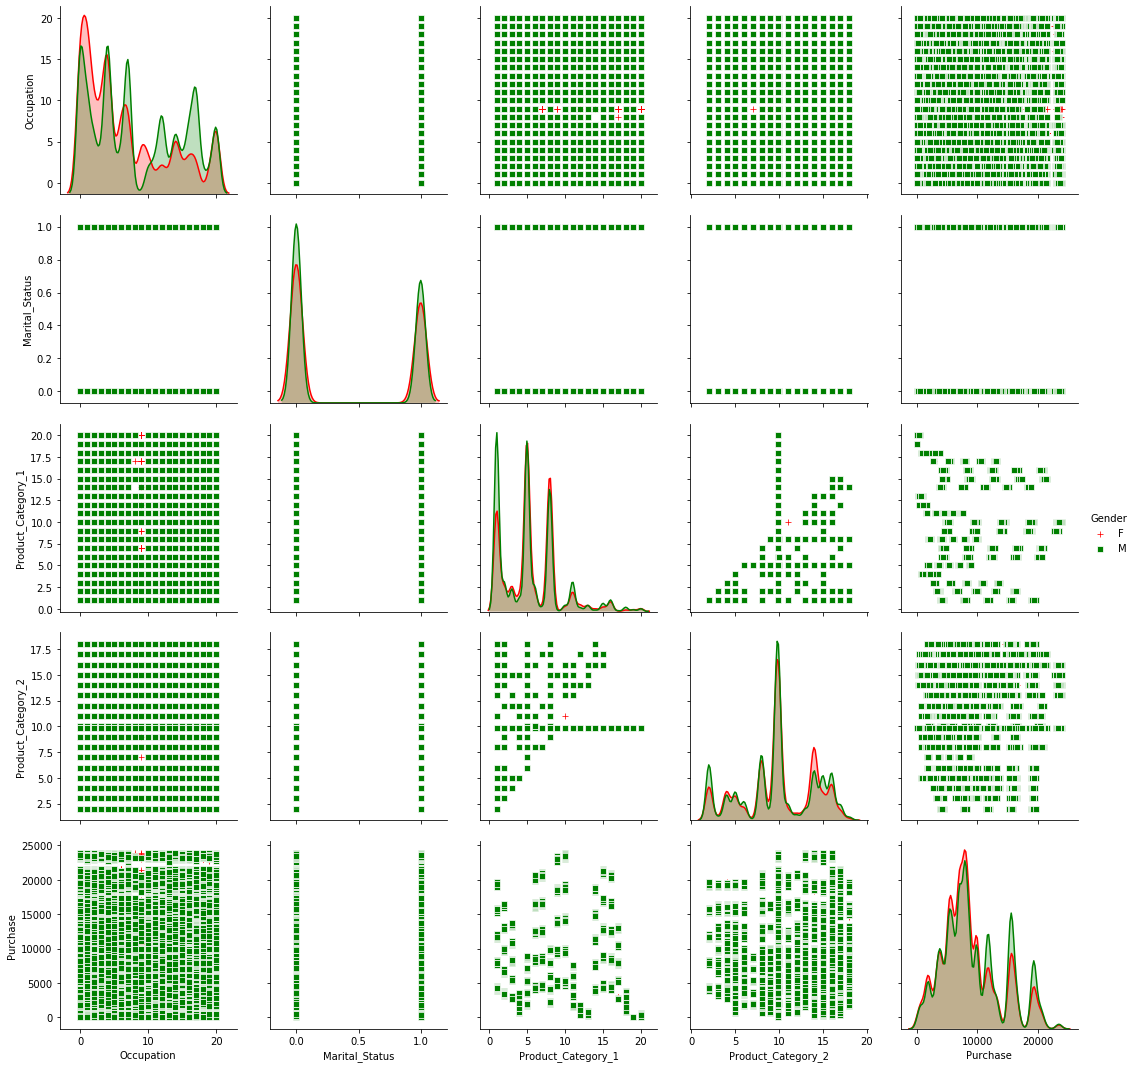

In [26]:
pal = ['red','green','blue']
sns.pairplot(Blackfriday_train,hue='Gender',palette=pal,size=3,markers=['+','s'])

C:\Users\Anju\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Anju\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


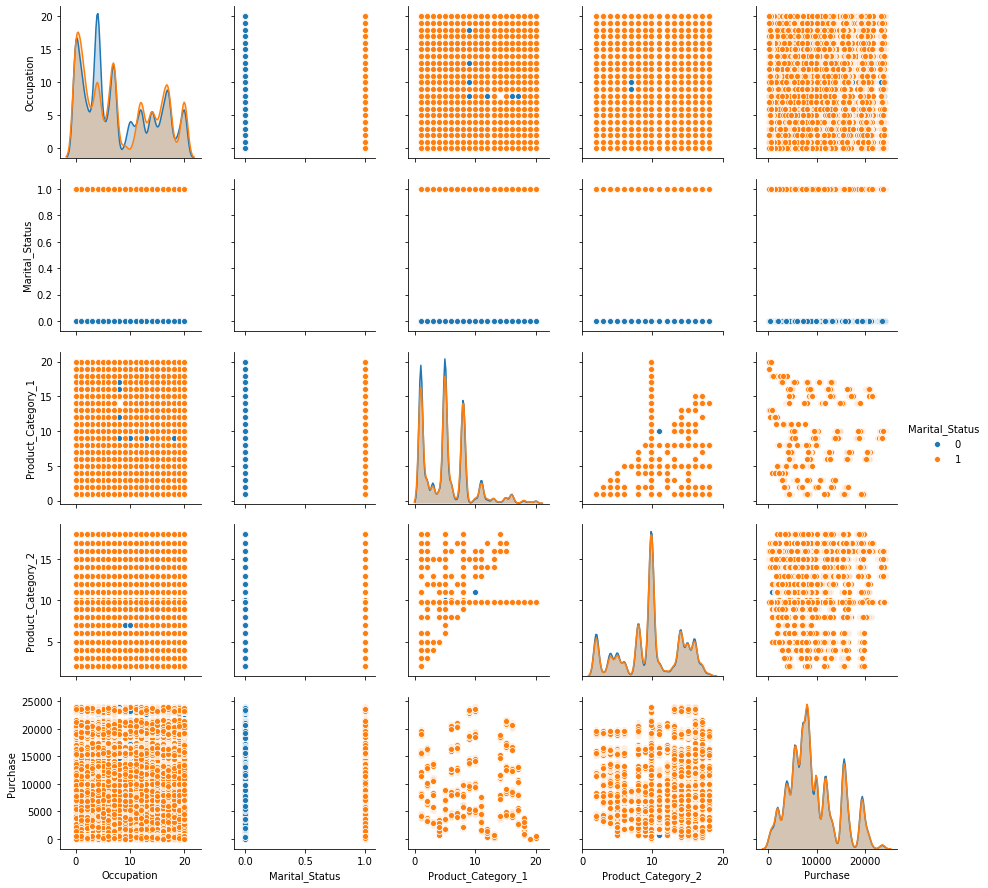

In [27]:
sns.pairplot(Blackfriday_train,hue = 'Marital_Status')

>  <font color='Purple'>*Plot box plot between Gender and Purchase.*</font>
>  1. <font color='Purple'>*From below plot, we can infer that males are buying higher value purchases than females even though there is very less difference between both.*</font>

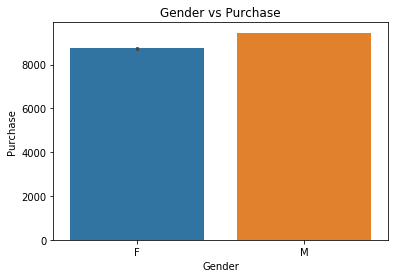

In [79]:
sns.barplot(x='Gender', y='Purchase', data=Blackfriday_train)
plt.title('Gender vs Purchase')
plt.show()

>  <font color='Purple'>*Calculate the average of male and female purchase data.*</font>

In [113]:
malesPurchaserData = Blackfriday_train.loc[Blackfriday_train['Gender'] == 'M']
malesPurchaseMean = np.mean(malesPurchaserData['Purchase'])
print("Purchase mean for male purchasers = ",malesPurchaseMean)

femalsPurchaserData = Blackfriday_train.loc[Blackfriday_train['Gender'] == 'F']
femalsPurchaseMean = np.mean(femalsPurchaserData['Purchase'])
print("Purchase mean for femal purchasers = ",femalsPurchaseMean)

Purchase mean for male purchasers =  9437.526040472265
Purchase mean for femal purchasers =  8734.565765155476


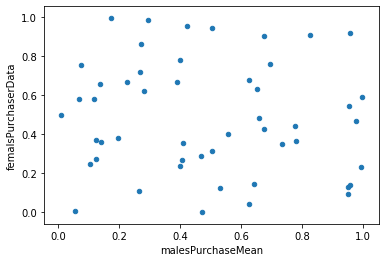

In [121]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(50, 2),columns=['malesPurchaseMean', 'femalsPurchaserData'])
df.plot.scatter(x='malesPurchaseMean', y='femalsPurchaserData')

#  here we can infer that there isn't much difference between the average.

>  <font color='Purple'>*Plot box plot between Marital_Status and Purchase.*</font>
>  1. <font color='Purple'>*From below plot, we can infer that marital status does not have much impact on purchase.Both married and non married have the same amount of purchase*</font>

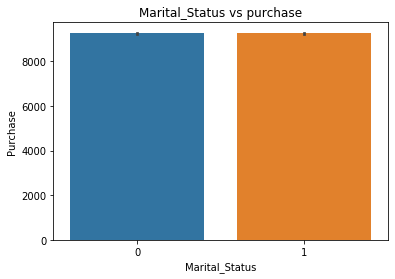

In [80]:
sns.barplot(x='Marital_Status', y='Purchase', data=Blackfriday_train)
plt.title('Marital_Status vs purchase')
plt.show()

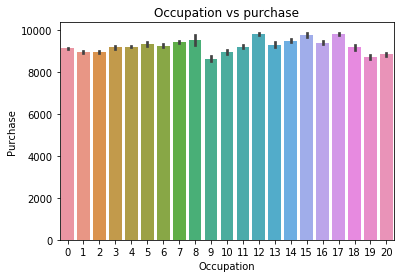

In [81]:
sns.barplot(x='Occupation', y='Purchase', data=Blackfriday_train)
plt.title('Occupation vs purchase')
plt.show()

>  1. <font color='Purple'>*From below plot, we can infer that Male population has higher amount of purchase with respect to oocupation as well*</font>

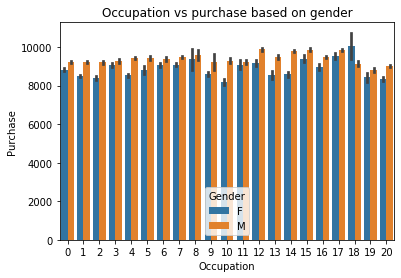

In [82]:
sns.barplot(x='Occupation', y='Purchase', hue = 'Gender',data=Blackfriday_train)
plt.title('Occupation vs purchase based on gender')
plt.show()

>  <font color='Purple'>*From below plot, we can infer that people residing in City_category C has done higher amount of purchase.*</font>

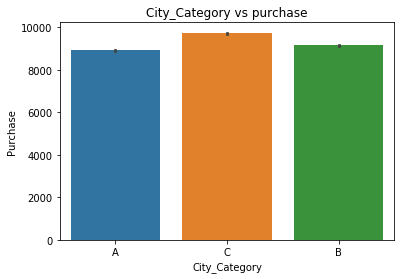

In [83]:
sns.barplot(x='City_Category', y='Purchase',data=Blackfriday_train)
plt.title('City_Category vs purchase')
plt.show()

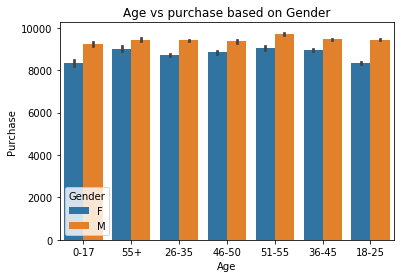

In [84]:
sns.barplot(x='Age', y='Purchase', hue = 'Gender', data=Blackfriday_train)
plt.title('Age vs purchase based on Gender')
plt.show()

> <font color='Purple'>*Number of males purchaser.*</font>

In [60]:
CountmalesPurchaser = Blackfriday_train.loc[Blackfriday_train['Gender'] == 'M']
CountmalesPurchaser.shape[0]  # shape[0] signifies only columns.

414259

> <font color='Purple'>*Number of females purchaser.*</font>

In [61]:
CountfemalesPurchaser = Blackfriday_train.loc[Blackfriday_train['Gender'] == 'F']
CountfemalesPurchaser.shape[0] # shape[0] signifies only columns.


135809

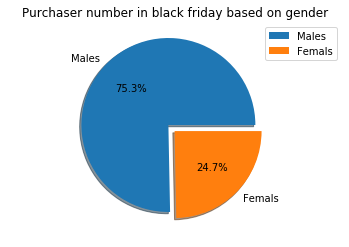

In [64]:
genderCount = [CountmalesPurchaser.shape[0],CountfemalesPurchaser.shape[0]]
labels=['Males','Femals']
plt.axis('equal')

plt.pie(genderCount, labels=labels,
              explode=[0.1,0],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(labels)
plt.title('Purchaser number in black friday based on gender')
plt.show()

>  <font color='Purple'>*From above, we can see that 75% of the population who purchased are Males.*</font><br>

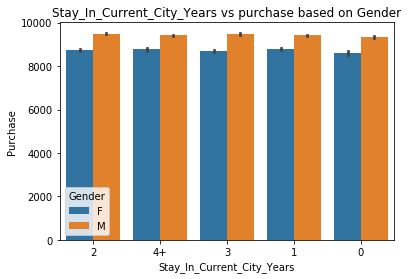

In [85]:
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', hue = 'Gender', data=Blackfriday_train)
plt.title('Stay_In_Current_City_Years vs purchase based on Gender')
plt.show()


>  <font color='Purple'>*From above and below, We can see that irrespective of the duration of stay, equal amount of purchase was done, however more by males.*</font><br>

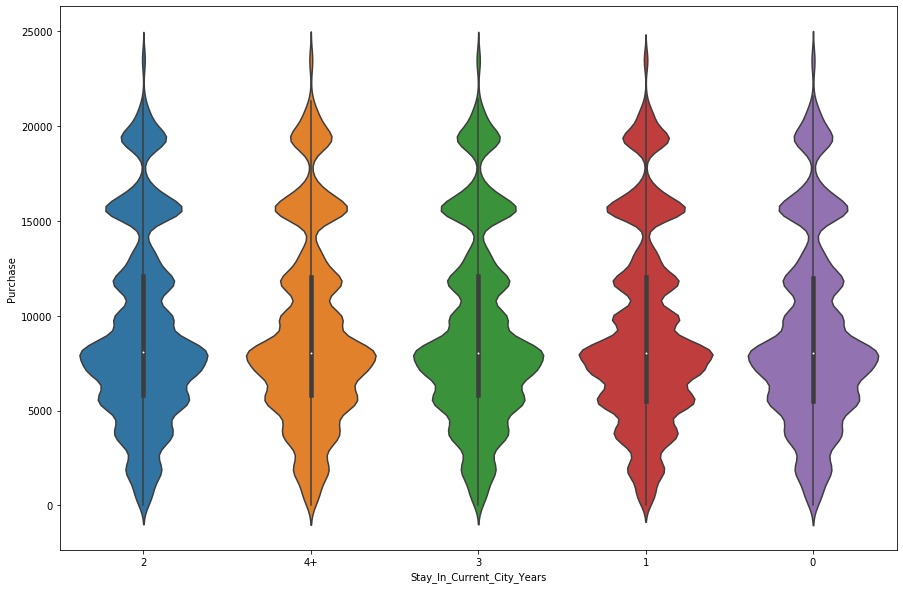

In [66]:
# violin plot for purchase against Stay duration.
fig=plt.figure(figsize=(15,10))
sns.violinplot(x="Stay_In_Current_City_Years", y="Purchase", data=Blackfriday_train);

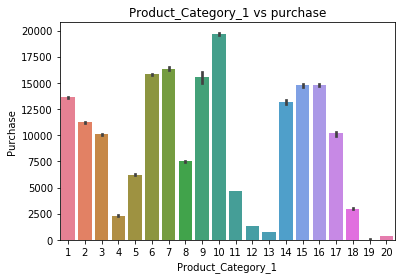

In [86]:
sns.barplot(x='Product_Category_1', y='Purchase', palette = 'husl', data=Blackfriday_train)
plt.title('Product_Category_1 vs purchase')
plt.show()


>  <font color='Purple'>*From above, We can see that the 10th item of the Product_Category_1 has the highest sale.*</font>

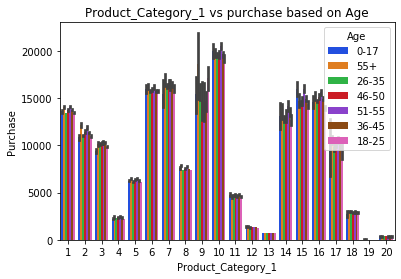

In [87]:
sns.barplot(x='Product_Category_1', y='Purchase', hue = 'Age', palette = 'bright', data=Blackfriday_train)
plt.title('Product_Category_1 vs purchase based on Age')
plt.show()

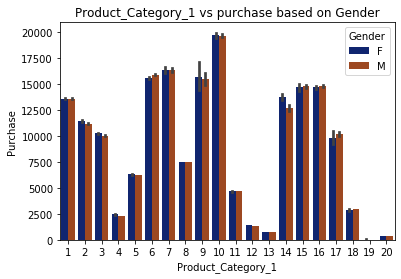

In [88]:
sns.barplot(x='Product_Category_1', y='Purchase', hue = 'Gender', palette = 'dark', data=Blackfriday_train)
plt.title('Product_Category_1 vs purchase based on Gender')
plt.show()

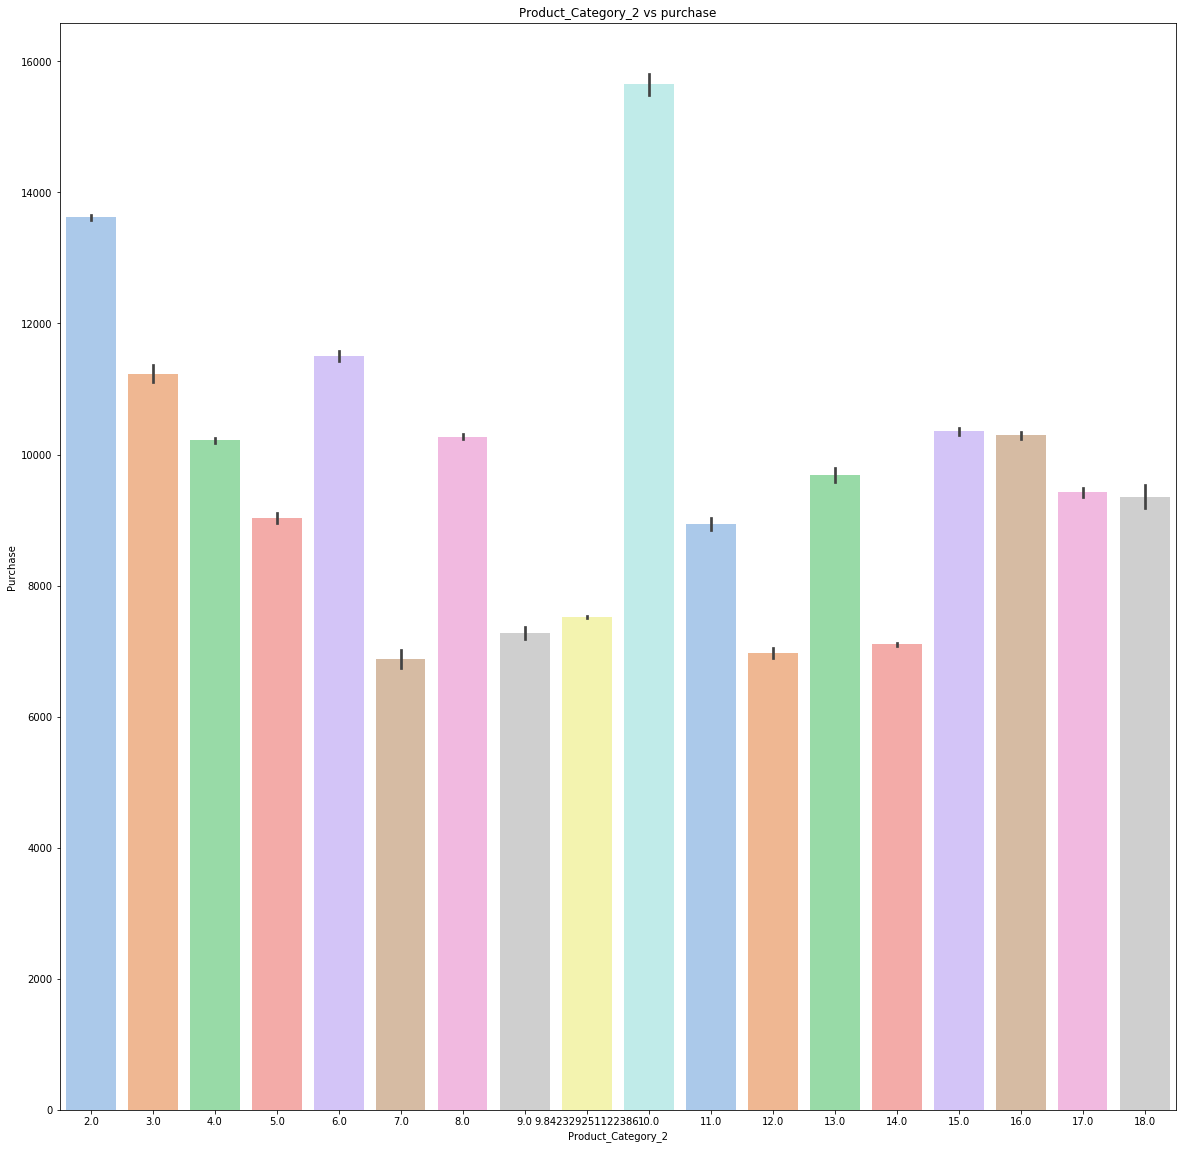

In [89]:
plt.subplots(figsize=(20, 20))
sns.barplot(x='Product_Category_2', y='Purchase', palette = 'pastel', data=Blackfriday_train)
plt.title('Product_Category_2 vs purchase')
plt.show()

>  <font color='Purple'>*Infering Purchase quantity based on residence duration in a particular city.*</font><br>

In [131]:
labels = []
values = []
yearsCountData = []

for uniqueYearsValue in Blackfriday_train['Stay_In_Current_City_Years'].sort_values().unique():
    CityYearsPurchaserData = Blackfriday_train.loc[Blackfriday_train['Stay_In_Current_City_Years'] == uniqueYearsValue]
    CityYearsPurchaserMean = np.mean(CityYearsPurchaserData['Purchase'])
    labels.append(uniqueYearsValue)
    values.append(CityYearsPurchaserMean)
    yearsCountData.append(CityYearsPurchaserData.shape[0])
    
    if uniqueYearsValue != 4:
        print("Mean purchase of people who stay ",uniqueYearsValue," years = ",CityYearsPurchaserMean)
    elif uniqueYearsValue == 4:
        print("Mean purchase of people who stay more than ",uniqueYearsValue," years = ",CityYearsPurchaserMean)

Mean purchase of people who stay  0  years =  9180.075122987177
Mean purchase of people who stay  1  years =  9250.145923300364
Mean purchase of people who stay  2  years =  9320.429810090536
Mean purchase of people who stay  3  years =  9286.904119221284
Mean purchase of people who stay  4+  years =  9275.59887165687


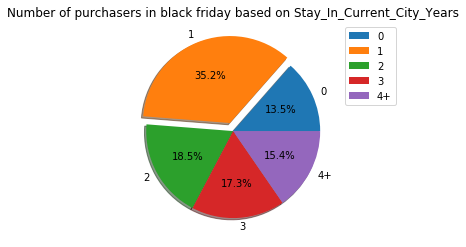

In [132]:
values = yearsCountData
labels = list(Blackfriday_train['Stay_In_Current_City_Years'].sort_values().unique())
plt.axis('equal')

plt.pie(values, labels=labels,
              explode=[0,0.1,0,0,0],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(labels)
plt.title('Number of purchasers in black friday based on Stay_In_Current_City_Years')
plt.show()


>  <font color='Purple'>*From above pie plot, it can be understood that people who stay longer in city have less action towards buying than others.We must take care of people who stay in range 1 year in city because they have more action towards buying than others.*</font><br>

# <font color='Blue'> Determining which Product category(Category 1 or category 2) has more profit.</font>

In [135]:
Product_Category_1_sum = Blackfriday_train['Product_Category_1'].sum()
Product_Category_2_sum = Blackfriday_train['Product_Category_2'].sum()

print("Profit from product of category 1 = ",Product_Category_1_sum)
print("Profit from product of category 2 = ",Product_Category_2_sum)

Profit from product of category 1 =  2972716
Profit from product of category 2 =  5413950.3665063875


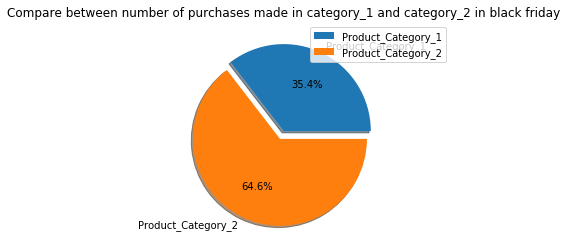

In [137]:
values = [Product_Category_1_sum,Product_Category_2_sum]
labels = ['Product_Category_1','Product_Category_2']
plt.axis('equal')

plt.pie(values, labels=labels,
              explode=[0,0.1],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(labels)
plt.title('Compare between number of purchases made in category_1 and category_2 in black friday')
plt.show()

# <font color='Green'>Hence, it is observed that profit from product of category 2 is more than product category 1.We must stock up more items of product of category 2 in the next Black friday sale</font>

# <font color='Blue'> One hot encoding.</font>

>  <font color='Purple'>*One hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers.*</font><br>

>  <font color = 'Purple'>*One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.*</font>

>  <font color = 'Purple'>*There are two types of encoding - Label encoding and One hot encoding. But one hot encoding is preferred because label encoding assumes higher the categorical value, better the category.This is why we use one hot encoder to perform “binarization” of the category and include it as a feature to train the model*</font>

>  - <font color = 'orange'>*The categorical columns in Blackfriday dataset are Gender,Age,City_Category, Stay_In_Current_City_Years*.</font>

>  - <font color = 'Orange'>*Before applying one hot encoding on my dataset, I need to check if my dataset has any variables/columns(for eg: Columns "Age and Stay_In_Current_City_Years" in Black friday dataset)  whose rows/features have numerical data but looks like category as they are not continuos and the data types are "object", so for these types of data, we need to convert them to string first using function ".astype(str)" and then perform one hot encoding which will create additional columns on the dataframe for these columns with 0's and 1'.*</font>


In [16]:
# Converting Numerical Object data to string before one hot encoding for train dataset.

Blackfriday_train['Age'] = Blackfriday_train['Age'].astype(str)
Blackfriday_train['Stay_In_Current_City_Years'] = Blackfriday_train['Stay_In_Current_City_Years'].astype(str)


In [29]:
# Converting Numerical Object data to string before one hot encoding for test dataset.

Blackfriday_test['Age'] = Blackfriday_test['Age'].astype(str)
Blackfriday_test['Stay_In_Current_City_Years'] = Blackfriday_test['Stay_In_Current_City_Years'].astype(str)

> <font color = 'orange'>*Applying one hot encoding on Blackfriday train and test dataset.*</font>

In [18]:
Blackfriday_train_encoded = pd.get_dummies(Blackfriday_train)

In [30]:
Blackfriday_test_encoded = pd.get_dummies(Blackfriday_test)

In [169]:
print('Count of features and Variables in original train dataset:', Blackfriday_train.shape)

Count of features and Variables in original train dataset: (550068, 9)


In [170]:
print('Count of features and Variables in original test dataset:', Blackfriday_test.shape)

Count of features and Variables in original test dataset: (233599, 8)


In [171]:
print('Count of features and Variables in encoded train dataset:', Blackfriday_train_encoded.shape)

Count of features and Variables in encoded train dataset: (550068, 22)


In [31]:
print('Count of features and Variables in encoded test dataset:', Blackfriday_test_encoded.shape)

Count of features and Variables in encoded test dataset: (233599, 21)


> <font color = 'orange'>*Below code will display all the columns of the dataset.*</font>

In [20]:
pd.set_option('display.max_columns', None)

In [15]:
print('                          ')
print('Display first 5 rows of the encoded dataset:')
print('                         ')
Blackfriday_train_encoded.head(5)

                          
Display first 5 rows of the encoded dataset:
                         


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,9.842329,8370,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.000000,15200,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,10,0,12,9.842329,1422,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.000000,1057,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,16,0,8,9.842329,7969,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


# <font color='Blue'> Separate the Dependent and Independent variables from Blackfriday_train_encoded dataset.</font>

In [21]:
Blackfriday_encodedtrain_ind = Blackfriday_train_encoded.drop(['Purchase'],axis=1)
Blackfriday_encodedtrain_target = Blackfriday_train_encoded['Purchase']

In [41]:
print('                       ')
print('Dataframe with all the independent variables:')
Blackfriday_encodedtrain_ind.head(1)

                       
Dataframe with all the independent variables:


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,9.842329,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [42]:
print('                       ')
print('Dataframe with the dependent variable "Purchase":')
Blackfriday_encodedtrain_target.head(2)

                       
Dataframe with the dependent variable "Purchase":


0     8370
1    15200
Name: Purchase, dtype: int64

# <font color='Blue'> Split the datasets 'Blackfriday_encodedtrain_ind' and 'Blackfriday_encodedtrain_target'  into train and test.</font>

In [23]:
x_train, x_test, y_train, y_test = train_test_split(Blackfriday_encodedtrain_ind,
                                                    Blackfriday_encodedtrain_target,
                                                    test_size = 0.20,
                                                    random_state=1211)

In [44]:
print('               ')
print('"x_train" dataset contains 21 independent columns with 440054 rows:')
x_train.shape

               
"x_train" dataset contains 21 independent columns with 440054 rows:


(440054, 21)

In [45]:
print('               ')
print('"x_test" dataset contains 21 independent columns with 110014 rows:')
x_test.shape

               
"x_test" dataset contains 21 independent columns with 110014 rows:


(110014, 21)

In [46]:
print('               ')
print('"y_train" dataset contains 1 dependent column "Purchase" with 440054 rows:')
y_train.shape

               
"y_train" dataset contains 1 dependent column "Purchase" with 440054 rows:


(440054,)

In [47]:
print('               ')
print('"x_test" dataset contains 1 dependent column "Purchase" with 110014 rows:')
y_test.shape

               
"x_test" dataset contains 1 dependent column "Purchase" with 110014 rows:


(110014,)

In [48]:
# Note: The leftmost numbers represent the random number generated by the "random state" function for each row.

x_train.head()


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
225666,7,0,4,8.0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
423711,7,0,8,16.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
94874,4,1,1,2.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
178366,0,1,1,16.0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
234937,13,0,5,8.0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [49]:
x_test.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
388515,20,0,8,13.000000,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
296148,12,0,5,9.842329,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
433488,12,0,5,9.842329,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
465815,2,0,1,15.000000,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
280166,1,0,3,4.000000,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [50]:
y_train.head()

225666     2104
423711     5878
94874     15281
178366    15710
234937     5167
Name: Purchase, dtype: int64

In [51]:
y_test.head()

388515     4149
296148     5458
433488     5441
465815    19631
280166    13248
Name: Purchase, dtype: int64

# <font color = 'Blue' > Define function to calculate the accuracy and metric.</font>.
    

In [24]:
def calculate_accuracy(actual, predicted):
    SST = 0
    SSR = 0
    SSE = 0
    RMSE = 0
    VIF = 0
    RSqr = 0
    MAE = 0
    MAPE = 0
    SST = sum((actual - np.mean(predicted))**2)    # Calculate the SST
    SSR = sum((predicted - np.mean(predicted))**2) # Calculate the SSR
    SSE = sum((actual - predicted)**2)             # Calculate the SSE
    RMSE = np.sqrt((sum((predicted - actual)**2))/len(predicted))  # Calculate the RMSE
    RSqr = 1 - (SSE/SST)                           # Calcualte the R_square
    if RSqr != 1:
        VIF = 1 / (1 - RSqr)                           # Calculate the VIF
    #MAPE_house_price = mape(dtc_predict_train, y_train)           # Calculate the MAPE
    #MAE_house_price = mae(y_train, dtc_predict_train)             # Calculate the MAE
    return RMSE, RSqr, VIF

# <font color = 'Blue'> Building models. </font>

# <font color = 'Purple'> Linear regression model without grid search.</font>

>  <font color = 'Brown'>*Creating the Linear regression model.*</font>

In [103]:
from sklearn.linear_model import LinearRegression
lnrg = LinearRegression()

# create the model
print('Summary of the linear regression model on splitted blackfriday train dataset where x_train has all the independent variables and y_train has the dependent varaible')
lnrg.fit(x_train,y_train)


Summary of the linear regression model on splitted blackfriday train dataset where x_train has all the independent variables and y_train has the dependent varaible


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

>  <font color = 'Brown'>*Predicting values of dependent variable "Purchase" on train dataset using above model.*</font>

In [104]:
# prediction on train data and imputing less than 0 values with mean.
lnrg_predict_train = lnrg.predict(x_train)
lnrg_predict_train[lnrg_predict_train < 0] = lnrg_predict_train.mean()
print('The predicted values of "Purchase" on splitted black friday train dataset using linear regression model are:')
lnrg_predict_train


The predicted values of "Purchase" on splitted black friday train dataset using linear regression model are:


array([ 9552.91770999,  7782.45214652, 10869.79201389, ...,
       11950.58076222, 11997.81231566,  8573.80490874])

>  <font color = 'Brown'>*Predicting values of dependent variable "Purchase" on test dataset using above model.*</font>

In [105]:
# prediction on test data
lnrg_predict_test = lnrg.predict(x_test)
lnrg_predict_test[lnrg_predict_test < 0] = lnrg_predict_test.mean()
print('The predicted values of "Purchase" on splitted black friday test dataset using linear regression model are:')
lnrg_predict_test

The predicted values of "Purchase" on splitted black friday test dataset using linear regression model are:


array([8042.9516798 , 9467.27945597, 9307.31153909, ..., 8908.23715657,
       8748.94512605, 8999.54479319])

>  <font color = 'Brown'>*Calculating accuracies on train and test.*</font>

In [106]:
# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,lnrg_predict_train)
print('Linear RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,lnrg_predict_test)
print('Linear RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Linear RMSE train =  4692.24948145144 R-Square train =  0.1278613767116723 VIF train =  1.1466067128521167
Linear RMSE test =  4682.647897169205 R-Square test =  0.1290236643780457 VIF test =  1.1481368196828348


# <font color = 'Purple'>Decision tree model without grid search.</font>

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(random_state=1)

# create the model
dtc.fit(x_train,y_train)

# prediction on train data
dtc_predict_train = dtc.predict(x_train)

# prediction on test data
dtc_predict_test = dtc.predict(x_test)


print('Summary of decision tree model:',dtc.fit(x_train,y_train))

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,dtc_predict_train)
print('Decision Tree RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,dtc_predict_test)
print('Decision Tree RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Summary of decision tree model: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')
Decision Tree RMSE train =  2526.8396992992384 R-Square train =  0.7470825974530506 VIF train =  3.9538599951198243
Decision Tree RMSE test =  3136.4334615600806 R-Square test =  0.6092539416947171 VIF test =  2.5592068780863246


# <font color = 'Purple'>Decision tree model with grid search.</font>

# <font color = 'Purple'>Random forest model without grid search.</font>

In [27]:
# random Forest

from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()

# Create the Random forest model
rfc.fit(x_train,y_train)

# prediction on train data
rfc_predict_train = rfc.predict(x_train)

# prediction on test data
rfc_predict_test = rfc.predict(x_test)

print('Summary of random forest model:',rfc.fit(x_train,y_train))

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,rfc_predict_train)
print('Random Forest RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,rfc_predict_test)
print('Random Forest RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Summary of random forest model: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Random Forest RMSE train =  2551.6047357807042 R-Square train =  0.7421008649358758 VIF train =  3.8774848925001604
Random Forest RMSE test =  3003.821628868883 R-Square test =  0.6416011353472652 VIF test =  2.7901874102445468


# <font color = 'Purple'>Extra tree regressor without grid search.</font>

In [19]:
from sklearn.tree import ExtraTreeRegressor
etr = ExtraTreeRegressor()

# Create the model
etr.fit(x_train, y_train)

# prediction on train data
etr_predict_train = etr.predict(x_train)

# prediction on test data
etr_predict_test = etr.predict(x_test)

print('Summary of Extra tree regressor:',etr.fit(x_train,y_train))

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,etr_predict_train)
print('Extra tree regressor RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,etr_predict_test)
print('Extra tree regressor RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Summary of Extra tree regressor: ExtraTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                   max_features='auto', max_leaf_nodes=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, random_state=None,
                   splitter='random')
Extra tree regressor RMSE train =  2526.8396992992384 R-Square train =  0.7470825974530506 VIF train =  3.9538599951198243
Extra tree regressor RMSE test =  3141.7162835225186 R-Square test =  0.6079366438908286 VIF test =  2.5506081719137925


# <font color = 'Purple'> XGBoost model without grid search.</font>

In [20]:
xgb = xgb.XGBRegressor(max_depth = 3, n_estimator = 300, learning_rate = 0.05)

# Create the model
xgb.fit(x_train, y_train)

# prediction on train data
xgb_predict_train = xgb.predict(x_train)

# prediction on test data
xgb_predict_test = xgb.predict(x_test)

print('Summary of XGBoost model:',xgb.fit(x_train,y_train))

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,xgb_predict_train)
print('XGBoost RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,xgb_predict_test)
print('XGboost Forest RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)



C:\Users\Anju\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Summary of XGBoost model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimator=300,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)
XGBoost RMSE train =  3052.7658015611914 R-Square train =  0.6308876821922573 VIF train =  2.7092024615685246
XGboost Forest RMSE test =  3045.062

# <font color = 'Purple'> Lasso Regression without grid search.</font>

In [21]:
from sklearn.linear_model import Lasso
lso = Lasso()

# Create the model
lso.fit(x_train, y_train)

# prediction on train data
lso_predict_train = lso.predict(x_train)

# prediction on test data
lso_predict_test = lso.predict(x_test)

print('Summary of Lasso Regression model:',lso.fit(x_train,y_train))

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,lso_predict_train)
print('Lasso RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,lso_predict_test)
print('Lasso RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Summary of Lasso Regression model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso RMSE train =  4692.264522114424 R-Square train =  0.12785578554940102 VIF train =  1.1465993621593222
Lasso RMSE test =  4682.637907245318 R-Square test =  0.12902739075126135 VIF test =  1.1481417318766827


# <font color = 'Purple'> Ridge Regression without grid search.</font>

In [22]:
from sklearn.linear_model import Ridge
rdge = Ridge(alpha=10)

# Create the model
rdge.fit(x_train, y_train)

# prediction on train data
rdge_predict_train = rdge.predict(x_train)

# prediction on test data
rdge_predict_test = rdge.predict(x_test)

print('Summary of Ridge Regression model:',rdge.fit(x_train,y_train))

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,rdge_predict_train)
print('Ridge RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,rdge_predict_test)
print('Ridge RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)




Summary of Ridge Regression model: Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Ridge RMSE train =  4692.249482513964 R-Square train =  0.1278613763166948 VIF train =  1.1466067123328372
Ridge RMSE test =  4682.647691935164 R-Square test =  0.12902374080243217 VIF test =  1.1481369204268577


<!DOCTYPE html>
<html>
<head>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>
<body>

<h2>Comparison of accuracy between different models</h2>
<p>Model Compare table.</p>

<table style="width:100%">
  <tr>
    <th>Algorithms</th>
    <th>RMSE-train</th> 
    <th>RMSE-test</th>
    <th>R^2 - train</th>
    <th>R^2 - test</th> 
    <th>Vif-train</th>
    <th>Vif-test</th>
  </tr>
  <tr>
    <td>Linear regression model</td>
    <td>4692.24</td>
    <td>4682.64</td>
    <td>0.127</td>
    <td>0.129</td>
    <td>1.14</td>
    <td>1.14</td>
  </tr>
  <tr>
    <td>Decision tree model</td>
    <td>2526.83</td>
    <td>3136.43</td>
    <td>0.747</td>
    <td>0.609</td>
    <td>3.95</td>
    <td>2.25</td>
  </tr>
  <tr>
    <td>Random forest model</td>
    <td>2551.62</td>
    <td>3003.17</td>
    <td>0.742</td>
    <td>0.641</td>
    <td>3.87</td>
    <td>2.79</td>
  </tr>
  <tr>
    <td>Extra tree regressor</td>
    <td>2526.83</td>
    <td>3141.71</td>
    <td>0.747</td>
    <td>0.607</td>
    <td>3.95</td>
    <td>2.55</td>
  </tr>
  <tr>
    <td>XGBoost model</td>
    <td>3052.76</td>
    <td>3045.06</td>
    <td>0.63</td>
    <td>0.63</td>
    <td>2.7</td>
    <td>2.71</td>
  </tr>
  <tr>
    <td>Lasso Regression</td>
    <td>4692.26</td>
    <td>4682.63</td>
    <td>0.127</td>
    <td>0.129</td>
    <td>1.146</td>
    <td>1.148</td>
  </tr>
  <tr>
    <td>Ridge Regression</td>
    <td>4692.24</td>
    <td>4682.64</td>
    <td>0.127</td>
    <td>0.129</td>
    <td>1.146</td>
    <td>1.148</td>
  </tr>
</table>

</body>
</html>


# <font color='Blue'>Chosing the best model.</font>
>  - <font color='brown'>*With the accuracy matrix shown above, it was seen that the tree based models like Decision Tree, Random Forest, Extra Tree  and XGBoost had a better
accuracy. Decision Tree, random Forest and Extra Tree regressor had the maximum accuracy of 74%
over training data however, it fell to 60%, 64% and 60% on test data.*</font>

>  - <font color='brown'>*The model "xgb" created using XG Boost had a R-Square value of 0.63 
for both train and test data. Hence, this model is more robust when compared
to the other models created.*</font>

>  - <font color='brown'>*However, as per the accuracy is concerned, "rfc" model created using random forest algorithm had
the maximum accuracy of 74% and 64% over train and test data respectively and can be considered the best for the given dataset.*</font>

# <font color='Blue'>Applying best algorithm "rfc" to our test sample dataset downloaded from kaggle to predict the purchase values and storing it in new column "Predictedpurchase".</font>

In [32]:
print('Display original data of test dataset:')
Blackfriday_test.head(1)

Display original data of test dataset:


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,M,46-50,7,B,2,1,1,11.0


In [33]:
Blackfriday_test.shape

(233599, 8)

>  <font color='brown'>*Applying rfc model, calculated above, on 'one hot encoded test dataset' to predict purchase amount based on features available on the test dataset.We need to use test dataset after one hot encoding as model will not work on categorical columns.*</font>


In [37]:
Blackfriday_test_encoded['PredictedPurchase'] = rfc.predict(Blackfriday_test_encoded)

In [38]:
Blackfriday_test_encoded.head(2)

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,PredictedPurchase
0,7,1,1,11.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,17811.082405
1,17,0,3,5.0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,10608.954905


In [39]:
# Adding above 'predicted purchase values' to our test dataset downloaded from kaggle.

Blackfriday_test['Predictedpurchase'] = Blackfriday_test_encoded['PredictedPurchase']


In [40]:
print('Display final data with prediction of test dataset:')
Blackfriday_test.head(6)

Display final data with prediction of test dataset:


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Predictedpurchase
0,M,46-50,7,B,2,1,1,11.0,17811.082405
1,M,26-35,17,C,0,0,3,5.0,10608.954905
2,F,36-45,1,B,4+,1,5,14.0,8197.942165
3,F,36-45,1,B,4+,1,4,9.0,2461.460833
4,F,26-35,1,C,1,0,4,5.0,1658.369992
5,M,46-50,1,C,3,1,2,3.0,12742.562097


In [41]:
print('Number of missing values in test dataset = ',Blackfriday_train.isnull().sum().max())

Number of missing values in test dataset =  0


# <font color='Blue'>Conclusion.</font>

>  <font color='brown'>*Hence, the individual or any combination of the various above features, derived from historical data of the previous years,
which predicts the highest sale purchase need to be taken care of, in the upcoming Black Friday sales to bring in more profit.*</font>